In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# plot spectrum function
def spec(g, title):
    w, v = la.eig(np.array(nx.adjacency_matrix(g).todense()))
    plt.plot(range(1, len(w) + 1), np.sort(np.real(w)), 'ro')
    plt.xlabel('Eigenvalue index')
    plt.ylabel('Eigenvalue')
    plt.title(title)
    #plt.rcParams["figure.figsize"] = [16,9]
    plt.show()
    return w, v

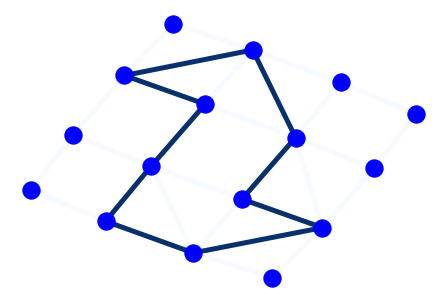

In [4]:
# left image from above, edges are resonators

# make all hopping terms zero
g_l = nx.grid_graph([4,4])
sd = 2 # seed for layout
pos = nx.spring_layout(g_l, seed = sd)
edge_list = [e for e in g_l.edges]
for i in range(0, len(edge_list)):
    g_l[edge_list[i][0]][edge_list[i][1]]['weight'] = 0

# fill in hopping terms for right image, keep at 0
hop_list_r = [((0,3),(1,3)),((1,3),(1,2)),((1,2),(2,2)), ((2,2),(3,1)), ((3,1),(2,1)), ((2,1),(2,0)),
             ((2,0),(1,1)),((1,1),(0,2)), ((0,2),(0,3))]
g_l.add_edges_from(hop_list_r)
for i in range(0, len(hop_list_r)):
    g_l[hop_list_r[i][0]][hop_list_r[i][1]]['weight'] = 0
    
# fill in hopping terms for left image, make them 1
hop_list_l = [((0,2),(1,3)), ((1,3),(1,2)), ((1,2),(2,2)), ((2,2),(3,2)), ((3,2),(3,1)), 
           ((3,1),(2,0)), ((2,0),(2,1)), ((2,1),(1,1)), ((1,1),(0,2))]
g_l.add_edges_from(hop_list_l)
for i in range(0, len(hop_list_l)):
    g_l[hop_list_l[i][0]][hop_list_l[i][1]]['weight'] = 1
    
edges,weights = zip(*nx.get_edge_attributes(g_l,'weight').items())
nx.draw(g_l, pos, node_color='b', edgelist=edges, edge_color=weights, width=5, edge_cmap=plt.cm.Blues)

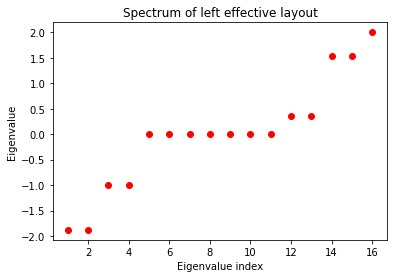

In [7]:
w, v = spec(g_l, 'Spectrum of left effective layout')

In [10]:
g_l_line = nx.line_graph(g_l)
edges,weights = zip(*nx.get_edge_attributes(g_l_line,'weight').items())
pos = nx.spring_layout(g_l_line)
nx.draw(g_l_line, pos, node_color='b', edgelist=edges, edge_color=weights, width=5, edge_cmap=plt.cm.Blues)
#w, v = spec(g_l_line, 'Spectrum of left layout')

ValueError: not enough values to unpack (expected 2, got 0)

In [ ]:
# line graph o